import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

In [20]:
from sklearn.ensemble import RandomForestClassifier

load the dataset

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

perview the data

In [3]:
print(df.head())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

dataset shape

In [4]:
print("Shape:", df.shape)

Shape: (299, 13)


Check for Nulls & Data Types

In [5]:
print(df.isnull().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


datatypes

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None


Basic EDA (Exploratory Data Analysis)

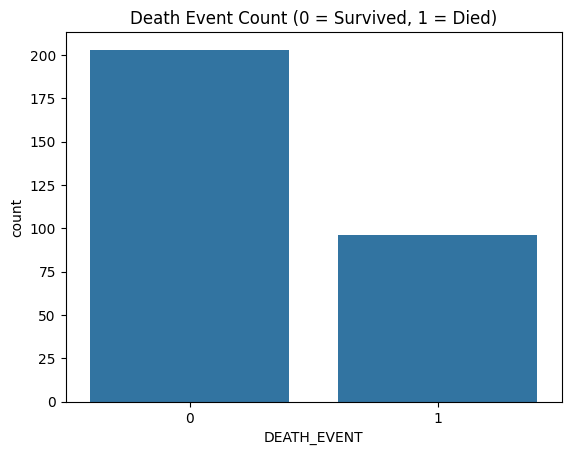

In [7]:
sns.countplot(x='DEATH_EVENT', data=df)
plt.title("Death Event Count (0 = Survived, 1 = Died)")
plt.show()

# Basic statistics of the dataset

In [8]:
print(df.describe())

              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.0

Features and Target Separation

In [10]:
X = df.drop('DEATH_EVENT', axis=1)


# Target

In [11]:
y = df['DEATH_EVENT']

Data Scaling

In [12]:
StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Train-Test Split

In [13]:
# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Train Logistic Regression

In [14]:
# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)


LogisticRegression()

In [15]:
# Predictions
y_pred_log = log_model.predict(X_test)

In [16]:
# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.8
[[34  1]
 [11 14]]
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        35
           1       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.77        60
weighted avg       0.83      0.80      0.79        60



# Random Forest Classifier


In [21]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
# Predictions
y_pred_rf = rf_model.predict(X_test)

In [23]:
# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.75
[[33  2]
 [13 12]]
              precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60



Hyperparameter Tuning for Random Forest

In [24]:
# Import Required Modules
from sklearn.model_selection import GridSearchCV

In [32]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],       # number of trees
    'max_depth': [None, 4, 6, 8],         # depth of each tree
    'min_samples_split': [2, 5, 10],      # minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]         # minimum samples in a leaf node
}

In [33]:
# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='accuracy', verbose=1)

In [34]:
# Fit on training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 4, 6, 8],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=1)

Check Best Parameters & Score

In [35]:
print("Best Accuracy Score from Grid Search: ", grid_search.best_score_)
print("Best Parameters: ", grid_search.best_params_)

Best Accuracy Score from Grid Search:  0.9038120567375886
Best Parameters:  {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [36]:
# Retrieve the best model
best_rf_model = grid_search.best_estimator_

In [37]:
# Evaluate it on test set
y_pred_best_rf = best_rf_model.predict(X_test)
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))

Tuned Random Forest Accuracy: 0.7333333333333333


OUTCOME
Although Random Forest achieved a higher accuracy during cross-validation (90%), it dropped significantly to 73% on the test set, indicating overfitting. Logistic Regression, being simpler and more robust on small datasets (299 rows), maintained a better generalization accuracy of 80%. Therefore, it was selected as the final model for deployment

In [38]:
# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [39]:
# Save model using pickle
with open('heart_model.pkl', 'wb') as file:
    pickle.dump(log_model, file)